## Importing relevant libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset

In [2]:
data = pd.read_csv("crimes.csv")
df = data.copy()

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [5]:
df.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Crime Pattern Analysis

## Identify the Most Frequent Crime

In [7]:
top_crimes = df['Crm Cd Desc'].value_counts().head(5)
print(top_crimes)

Crm Cd Desc
THEFT OF IDENTITY                                 22670
BATTERY - SIMPLE ASSAULT                          19694
BURGLARY FROM VEHICLE                             13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13215
INTIMATE PARTNER - SIMPLE ASSAULT                 11981
Name: count, dtype: int64


## Analyze Crime Trends Over Time

In [8]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

df['Month'] = df['Date Rptd'].dt.month
df['Year'] = df['Date Rptd'].dt.year

crime_trends = df.groupby(['Year','Month']).size().reset_index(name='Crime Count')
print(crime_trends)

    Year  Month  Crime Count
0   2022      6        14946
1   2022      7        14448
2   2022      8        15130
3   2022      9        14277
4   2022     10        14868
5   2022     11        13673
6   2022     12        15084
7   2023      1        14597
8   2023      2        13710
9   2023      3        13763
10  2023      4        13278
11  2023      5        13687
12  2023      6        13355
13  2023      7          899


## Hourly Crime Analysis

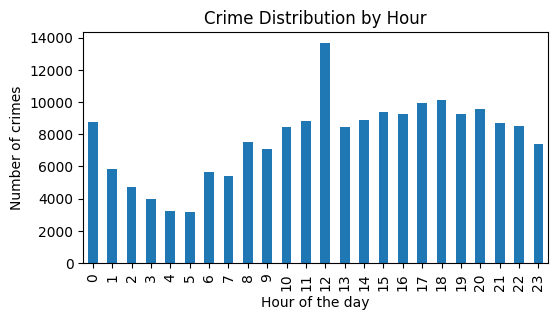

In [9]:
df['Hour'] = df['TIME OCC'] // 100

df['Hour'].value_counts().sort_index().plot(kind = 'bar', figsize=(6,3))
plt.xlabel('Hour of the day')
plt.ylabel('Number of crimes')
plt.title('Crime Distribution by Hour')
plt.show()

## Identify Seasonal Crime Trends

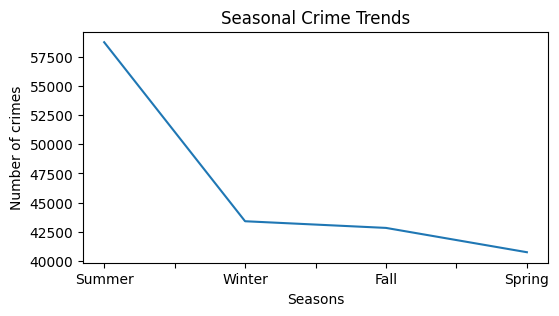

In [10]:
conditions = [
    df['Month'].isin([12,1,2]),
    df['Month'].isin([3,4,5]),
    df['Month'].isin([6,7,8]),
    df['Month'].isin([9,10,11])
]
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
df['Season'] = np.select(conditions, seasons, default='Unknown')
seasonal_trends = df['Season'].value_counts().plot(kind = 'line', figsize=(6,3))
plt.xlabel('Seasons')
plt.ylabel('Number of crimes')
plt.title('Seasonal Crime Trends')
plt.show()

## Crime Rate Change Over a Decade

In [11]:
crime_rt_by_year = df['Year'].value_counts().sort_index()
print(crime_rt_by_year)

Year
2022    102426
2023     83289
Name: count, dtype: int64


## Crime Correlation Analysis

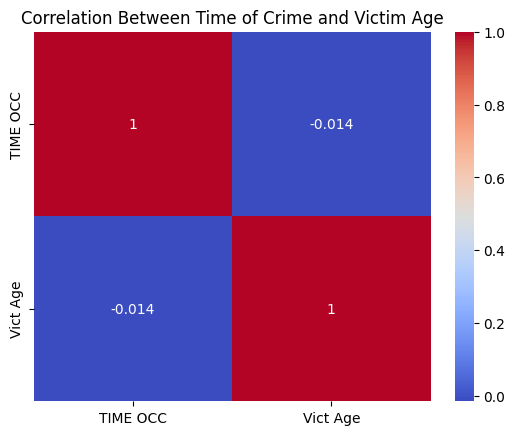

In [12]:
correlation = df[['TIME OCC', 'Vict Age']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Time of Crime and Victim Age')
plt.show()

## Weapon Usage Patterns

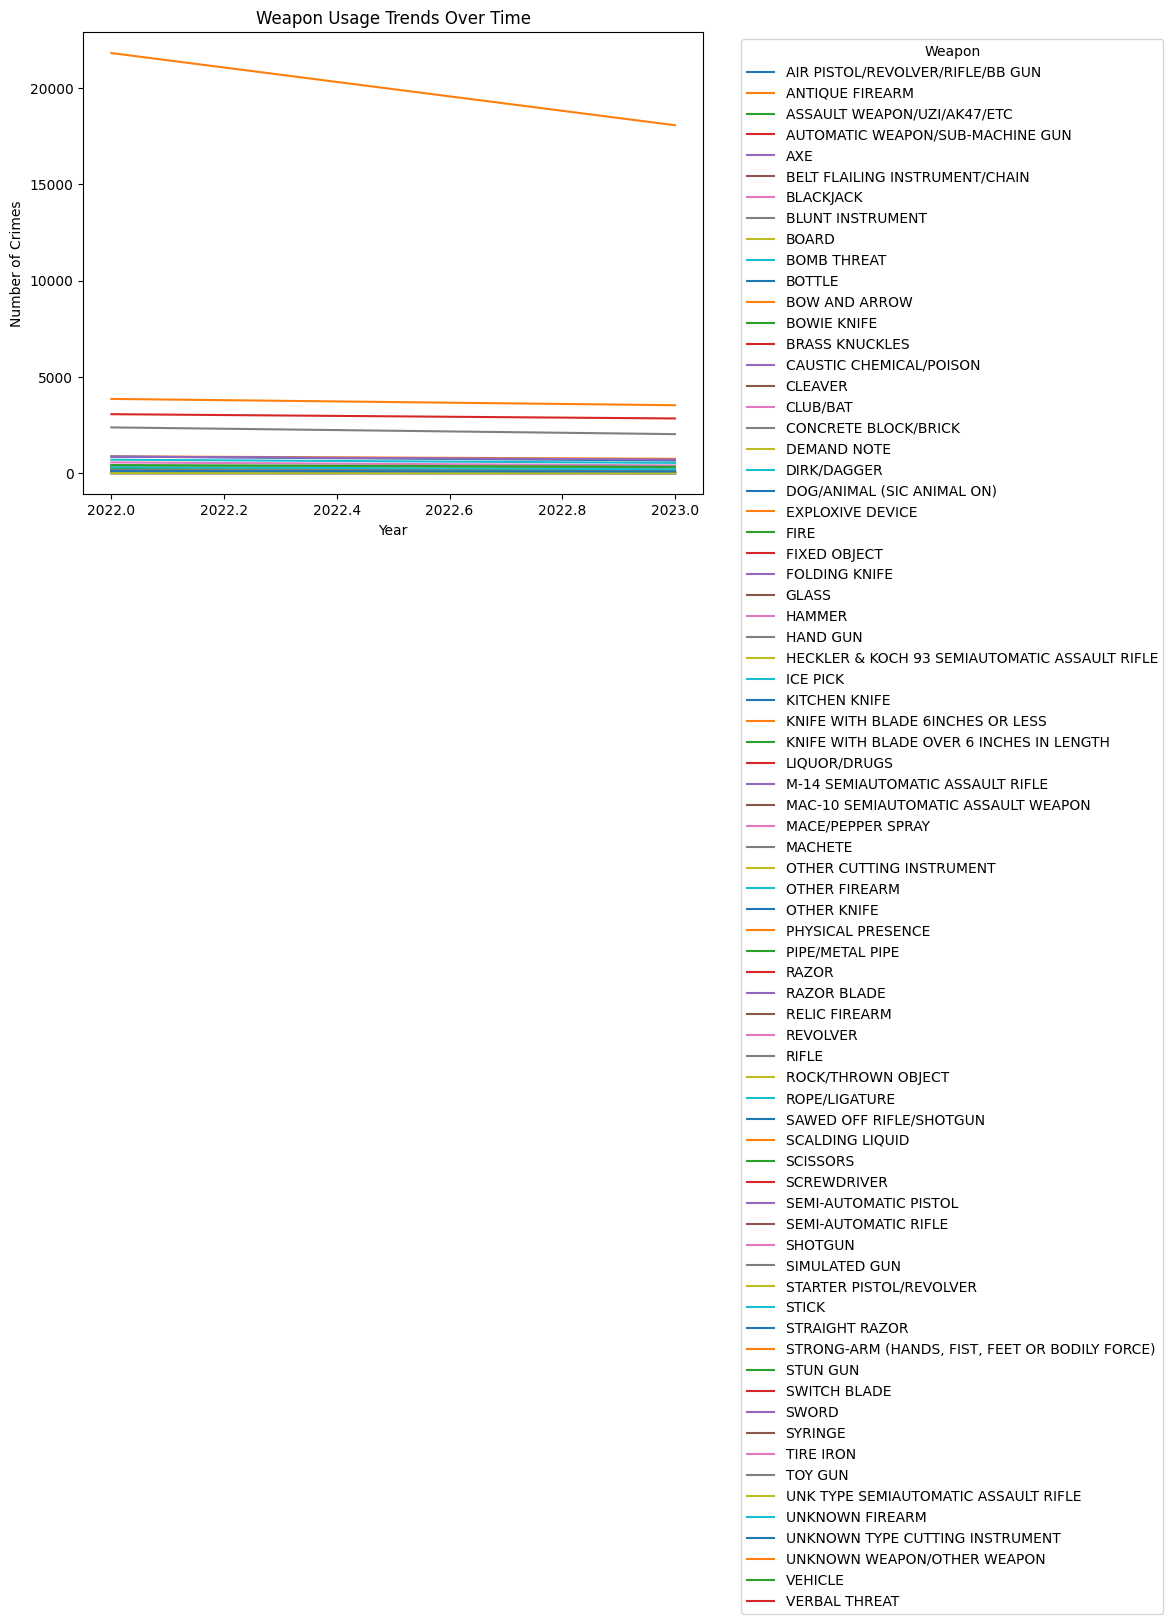

In [13]:
weapon_trends = df.groupby(['Weapon Desc', 'Year']).size().unstack(fill_value=0)

weapon_trends.T.plot(figsize=(8, 6))
plt.title('Weapon Usage Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Weapon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Weekday Crime Patterns

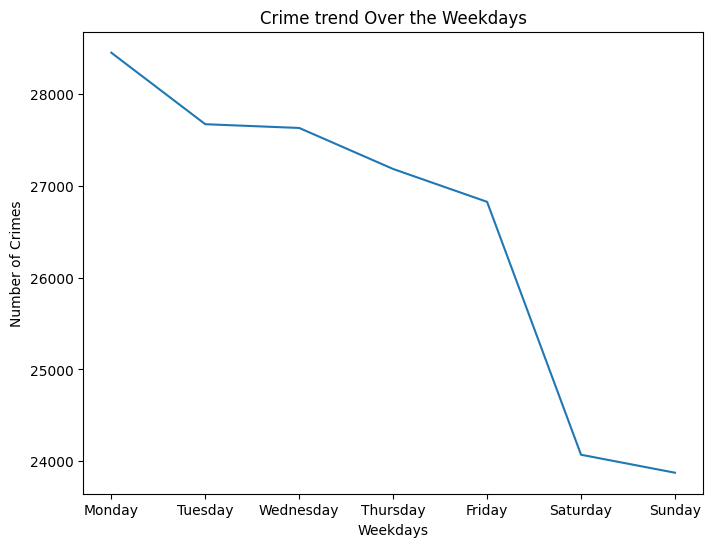

In [14]:
df['Weekday'] = pd.to_datetime(df['Date Rptd']).dt.day_name()

weekday_trends = df['Weekday'].value_counts().plot(kind='line', figsize=(8,6))
plt.title('Crime trend Over the Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Number of Crimes')
plt.show()

# Demographic Analysis

## Crime Victim Analysis by Descent

In [15]:
descent_distribution = df['Vict Descent'].value_counts(normalize=True) * 100
print(descent_distribution)

Vict Descent
H    39.917073
W    24.223904
B    18.809940
O     8.794055
A     2.971918
X     2.449046
K     0.747960
F     0.661264
C     0.651571
J     0.233166
V     0.176086
I     0.173393
Z     0.078081
P     0.044695
U     0.029078
D     0.011308
L     0.010770
S     0.008616
G     0.007539
-     0.000538
Name: proportion, dtype: float64


## Gender-Age Distribution of Victims

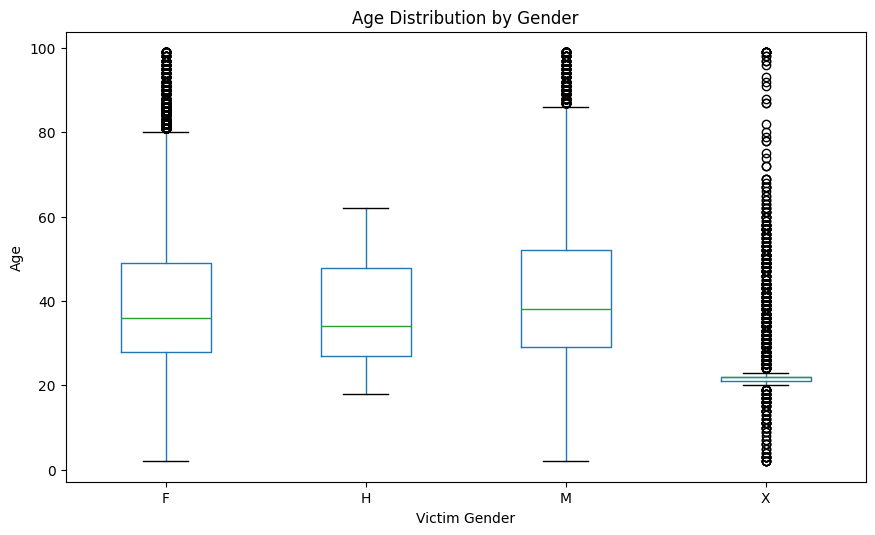

In [16]:
df.boxplot(column='Vict Age', by='Vict Sex', grid=False, figsize=(10, 6))
plt.title('Age Distribution by Gender')
plt.suptitle('')
plt.xlabel('Victim Gender')
plt.ylabel('Age')
plt.show()

## High-Risk Age Groups for Crimes

In [17]:
bins = [0, 18, 30, 50, 100]
labels = ['<18', '18-30', '30-50', '50+']
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels)

age_crime_risk = df.groupby(['Age Group', 'Crm Cd Desc']).size().unstack(fill_value=0)
print(age_crime_risk)

Crm Cd Desc  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
Age Group                                                          
<18              2                                             0   
18-30           68                                            41   
30-50          149                                            18   
50+            115                                             1   

Crm Cd Desc  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
Age Group                                                     
<18                                                     857   
18-30                                                  3852   
30-50                                                  5562   
50+                                                    2944   

Crm Cd Desc  ATTEMPTED ROBBERY  BATTERY - SIMPLE ASSAULT  \
Age Group                                                  
<18                         67                      1503   
18-30                      301  

C:\Users\UPAM ACHARYA\AppData\Local\Temp\ipykernel_5704\2710978391.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_crime_risk = df.groupby(['Age Group', 'Crm Cd Desc']).size().unstack(fill_value=0)


## Gender-Specific Crime Types

In [18]:
gender_crime_percentage = df.groupby(['Crm Cd Desc', 'Vict Sex']).size().unstack(fill_value=0)
gender_crime_percentage = (gender_crime_percentage.T / gender_crime_percentage.sum(axis=1)).T
print(gender_crime_percentage)

Vict Sex                                                   F         H  \
Crm Cd Desc                                                              
ARSON                                               0.404192  0.000000   
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER        0.016667  0.000000   
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      0.277887  0.000000   
ATTEMPTED ROBBERY                                   0.298929  0.000974   
BATTERY - SIMPLE ASSAULT                            0.467097  0.000102   
...                                                      ...       ...   
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BI...  0.259843  0.000000   
VIOLATION OF COURT ORDER                            0.697353  0.000000   
VIOLATION OF RESTRAINING ORDER                      0.746391  0.000000   
VIOLATION OF TEMPORARY RESTRAINING ORDER            0.752033  0.000000   
WEAPONS POSSESSION/BOMBING                          0.333333  0.000000   

Vict Sex                             

## Victim Profile Analysis

In [19]:
top_crime = df['Crm Cd Desc'].value_counts().idxmax()
victim_profile = df[df['Crm Cd Desc'] == top_crime].groupby('Vict Sex')['Vict Age'].describe()
print(victim_profile)

            count       mean        std   min   25%   50%   75%   max
Vict Sex                                                             
F         14426.0  38.863302  13.505052   6.0  29.0  36.0  45.0  99.0
H            11.0  33.909091   9.617219  25.0  27.0  32.0  36.0  58.0
M          8176.0  43.205602  14.798444   2.0  32.0  41.0  54.0  99.0
X            57.0  35.228070  11.495368  17.0  25.0  32.0  43.0  58.0


## Victim Age Analysis

In [20]:
age_analysis = df.groupby('Crm Cd Desc')['Vict Age'].mean().reset_index()
print(age_analysis)

                                           Crm Cd Desc   Vict Age
0                                                ARSON  44.452096
1         ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  27.883333
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  38.252516
3                                    ATTEMPTED ROBBERY  38.586173
4                             BATTERY - SIMPLE ASSAULT  40.318879
..                                                 ...        ...
99   VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...  36.448819
100                           VIOLATION OF COURT ORDER  42.812876
101                     VIOLATION OF RESTRAINING ORDER  43.385499
102           VIOLATION OF TEMPORARY RESTRAINING ORDER  45.150407
103                         WEAPONS POSSESSION/BOMBING  34.833333

[104 rows x 2 columns]


## Gender-based Crime Analysis

In [32]:
gender_distribution = df['Vict Sex'].value_counts(normalize=True) * 100
print(gender_distribution)

Vict Sex
M    50.084005
F    48.385603
X     1.514238
H     0.016155
Name: proportion, dtype: float64


# Geographic Analysis

## Crime Count by Area

In [22]:
area_crime_count = df['AREA NAME'].value_counts()
print(area_crime_count)

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64


## Region-Specific Crime Analysis

In [23]:
region_crime_analysis = df.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)
print(region_crime_analysis)

Crm Cd Desc  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
AREA NAME                                                          
77th Street     29                                             0   
Central         14                                             1   
Devonshire       8                                             0   
Foothill        19                                             0   
Harbor          10                                             0   
Hollenbeck      12                                             9   
Hollywood        4                                             0   
Mission         11                                             5   
N Hollywood     25                                             0   
Newton          28                                             3   
Northeast       16                                             0   
Olympic         16                                             2   
Pacific         11                              